# Python and Pandas 



## The importance of data preprocessing

Data preprocessing (also called data wrangling, cleaning, scrubbing, etc) is the most important thing you will do with your data because it sets the stage for the analysis part of your data analysis workflow. The preprocessing you do largely depends on what kind of data you have, what sort of analysis you'll be doing with your data, and what you intend to do with the results.

Preprocessing is also a process for getting to know your data, and can answer questions such as these (and more): 

- What kind of data are you working with? 
- Is it categorical, continuous, or a mix of both? 
- What's the distribution of features in your dataset? 
- What sort of wrangling do you have to do?
- Do you have any missing data? 
- Do you need to remove missing data?
- Do you need only a subset of your data?
- Do you need more data?
- Or less?

The questions you'll have to answer are, again, dependent upon the data that you're working with, and preprocessing can be a way to figure that out.

## What is Pandas?

Pandas is by far my favorite preprocessing tool. It's a data wrangling/modeling/analysis tool that is similar to R and Excel; in fact, the DataFrame data structure in Pandas was named after the DataFrame in R. Pandas comes with several easy-to-use data structures, two of which (the `Series` and the `DataFrame`) I'll be covering here.

I'll also be covering a bunch of different wrangling tools, as well as a couple of analysis tools.

## Why Pandas?

So, why would you want to use Python, as opposed to tools like R and Excel? I like to use it because I like to keep everything in Python, from start to finish. It just makes it easier if I don't have to switch back and forth between other tools. Also, if I have to build in preprocessing as part of a production system, which I've had to do at my job, it makes sense to just do it in Python from the beginning. 

Pandas is great for preprocessing, as we'll see, and it can be easily combined with other modules from the scientific Python stack.

## Pandas data structures

Pandas has several different data structures, but we're going to talk about the `Series` and the `DataFrame`.

### The Series

The `Series` is a one-dimensional array that can hold a variety of data types, including a mix of those types. The row labels in a `Series` are collectively called the index. You can create a `Series` in a few different ways. Here's how you'd create a `Series` from a list.

In [1]:
import pandas as pd

some_numbers = [2, 5, 7, 3, 8]

series_1 = pd.Series(some_numbers)
series_1

0    2
1    5
2    7
3    3
4    8
dtype: int64

To specify an index, you can also pass in a list.

In [2]:
ind = ['a', 'b', 'c', 'd', 'e']

series_2 = pd.Series(some_numbers, index=ind)
series_2

a    2
b    5
c    7
d    3
e    8
dtype: int64

We can pull that index back out again, too, with the `.index` attribute.

In [3]:
series_2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

You can also create a `Series` with a dictionary. The keys of the dictionary will be used as the index, and the values will be used as the `Series` array.

In [4]:
more_numbers = {'a': 9, 'b': 'eight', 'c': 7.5, 'd': 6}

series_3 = pd.Series(more_numbers)
series_3

a        9
b    eight
c      7.5
d        6
dtype: object

Notice how, in that previous example, We created a `Series` with integers, a float, and a string.

### The DataFrame

The `DataFrame` is Pandas' most used data structure. It's a two and greater dimensional structure that can also hold a variety of mixed data types. It's similar to a spreadsheet in Excel or a SQL table. You can create a `DataFrame` with a few different methods. First, let's look at how to create a `DataFrame` from multiple `Series` objects.

In [5]:
combine_series = pd.DataFrame([series_2, series_3])
combine_series

a      b    c  d    e
0  2      5  7.0  3  8.0
1  9  eight  7.5  6  NaN

Notice how in column `b`, we have two kinds of data. If a column in a `DataFrame` contains multiple types of data, the data type (or `dtype`) of the column will be chosen to accomodate all of the data. We can look at the data types of different columns with the `.dtypes` attribute. `object` is the most general, which is what has been chosen for column `b`.

In [6]:
combine_series.dtypes

a      int64
b     object
c    float64
d      int64
e    float64
dtype: object

Another way to create a `DataFrame` is with a dictionary of lists. This is pretty straightforward:

In [7]:
data = {'col1': ['i', 'love', 'pandas', 'so', 'much'],
        'col2': ['so', 'will', 'you', 'i', 'promise']}

df = pd.DataFrame(data)

## File I/O

It's really easy to read data into Pandas from a file. Pandas will read your file directly into a `DataFrame`. There are multiple ways to read in files, but they all work in the same way. Here's how you read in a CSV file:

In [8]:
mlbb_df = pd.read_csv('./dataset/mobile-legends-base-stats.csv')

In [9]:
mlbb_df.head()

HERO  MV_SPD  MGC_PWR  MGC_DFN  MANA  HP_RGN  BA_CC  P_ATK  P_DFN    HP  \
0     Miya     240        0       10   445      30      0    129     17  2524   
1  Balmond     260        0       10     0      47      0    119     25  2836   
2    Saber     260        0       10   443      35      0    118     17  2599   
3    Alice     240        0       10   493      36      0    114     21  2573   
4     Nana     250        0       10   510      34      0    115     17  2501   

   ATK_SPD  MANA_RGN  SKILL_CC ROLE SPECIALTY  
0    0.850        15         0   MM      Reap  
1    0.850         0         0   FT    Charge  
2    0.870        16         0  ASS    Charge  
3    0.800        18         0   MG    Charge  
4    0.864        18         0   SP      Poke

##### Here's a quick description of each column in the DataFrame:

* ```HERO``` - Hero name
* ```MV_SPD``` - movement speed
* ```MGC_PWR``` - magic power
* ```MGC_DFN``` - magic defense
* ```MANA``` - magic capacity
* ```HP_RGN``` - hitpoint regeneration rate
* ```BA_CC``` - base crowd control?
* ```P_ATK``` - P attack 
* ```P_DFN``` - P defense
* ```HP``` - hitpoints
* ```ATK_SPD``` - attack speed
* ```MANA_RGN``` - mana regeneration rate
* ```SKILL_CC``` - skill crowd control?
* ```ROLE``` - hero role
* ```SPECIALTY``` - hero specialty


The `head` and `tail` function allows examining the last 5 rows in a dataframe. Moreover value `x` can be passed as parameter to both functions to specify the `x` number of rows to return from the dataframe

In [10]:
mlbb_df.head(10)

HERO  MV_SPD  MGC_PWR  MGC_DFN  MANA  HP_RGN  BA_CC  P_ATK  P_DFN    HP  \
0     Miya     240        0       10   445      30      0    129     17  2524   
1  Balmond     260        0       10     0      47      0    119     25  2836   
2    Saber     260        0       10   443      35      0    118     17  2599   
3    Alice     240        0       10   493      36      0    114     21  2573   
4     Nana     250        0       10   510      34      0    115     17  2501   
5  Tigreal     260        0       10   450      42      0    112     25  2890   
6  Alucard     260        0       10     0      39      0    123     21  2821   
7   Karina     260        0       10   431      29      0    121     20  2633   
8     Akai     260        0       10   422      42      0    115     24  2769   
9   Franco     260        0       10   440      46      0    116     25  2709   

   ATK_SPD  MANA_RGN  SKILL_CC ROLE      SPECIALTY  
0    0.850        15         0   MM           Reap  
1    0.850         0         0   FT         Charge  
2    0.870        16         0  ASS         Charge  
3    0.800        18         0   MG         Charge  
4    0.864        18         0   SP           Poke  
5    0.826        12         0   TK  Crowd Control  
6    0.900         0         0   FT         Charge  
7    0.900        16         0  ASS         Charge  
8    0.850        12         0   TK      Initiator  
9    0.826        10         0   TK      Initiator

In [11]:
mlbb_df.tail(10)

HERO  MV_SPD  MGC_PWR  MGC_DFN  MANA  HP_RGN  BA_CC  P_ATK  P_DFN  \
73  Minsitthar     260        0       10   380      37      0    121     23   
74      Kadita     240        0       10   495      36      0    105     18   
75     Faramis     245        0       10   500      34      0    118     20   
76      Badang     255        0       10     0      40      0    119     23   
77      Khufra     255        0       10   460      47      0    117     19   
78     Granger     240        0       10     0      27      0    110     15   
79  Guineveree     260        0       10     0      39      0    126     18   
80   Esmeralda     240        0       10   502      36      0    114     21   
81     Terizla     255        0       10   430      54      0    129     19   
82     Dyrroth     265        0       10     0      41      0    117     22   

      HP  ATK_SPD  MANA_RGN  SKILL_CC ROLE      SPECIALTY  
73  2698    0.852        16         0   FT      Initiator  
74  2491    0.800        18         0   MG          Burst  
75  2543    0.784        19         0   SP      Initiator  
76  2708    0.908         0         0   FT         Charge  
77  2859    0.786        15         0   TK  Crowd Control  
78  2490    0.818         0         0   MM           Reap  
79  2528    0.918         0         0   MG         Charge  
80  2573    0.800        20         0   MG          Regen  
81  2728    0.800        21         0   FT         Damage  
82  2758    0.916         0         0   FT         Charge

## Exploring the data

Here are some different ways to explore the data we have. Let's first take a look at some of the basic characteristics of the `mlbb_df` dataset. You can easily find the number of rows and the number of columns a dataframe has using the `.shape` attribute.

In [12]:
mlbb_df.shape

(83, 15)

Getting column names from a `DataFrame` is also easy and can be done using the `.columns` attribute.

In [13]:
mlbb_df.columns

Index(['HERO', 'MV_SPD', 'MGC_PWR', 'MGC_DFN', 'MANA', 'HP_RGN', 'BA_CC',
       'P_ATK', 'P_DFN', 'HP', 'ATK_SPD', 'MANA_RGN', 'SKILL_CC', 'ROLE',
       'SPECIALTY'],
      dtype='object')

Another useful thing you can do is generate some summary statistics using the `describe()` function. The `describe()` function calculates descriptive statistics like the mean, standard deviation, and quartile values for continuous and integer data that exist in your dataset. Don't worry, Pandas won't try to calculate the standard deviation of your categorical values!

In [14]:
mlbb_df.describe()

MV_SPD  MGC_PWR  MGC_DFN        MANA     HP_RGN  BA_CC       P_ATK  \
count   83.000000     83.0     83.0   83.000000  83.000000   83.0   83.000000   
mean   251.445783      0.0     10.0  360.614458  38.096386    0.0  117.204819   
std      9.256841      0.0      0.0  200.854991   7.961208    0.0    7.256215   
min    240.000000      0.0     10.0    0.000000  27.000000    0.0   97.000000   
25%    240.000000      0.0     10.0  395.000000  34.000000    0.0  113.000000   
50%    255.000000      0.0     10.0  440.000000  36.000000    0.0  117.000000   
75%    260.000000      0.0     10.0  490.000000  40.000000    0.0  121.000000   
max    270.000000      0.0     10.0  750.000000  92.000000    0.0  135.000000   

           P_DFN           HP    ATK_SPD   MANA_RGN  SKILL_CC  
count  83.000000    83.000000  83.000000  83.000000      83.0  
mean   19.120482  2592.843373   0.839398  13.361446       0.0  
std     3.401569   213.004951   0.042113   7.608689       0.0  
min    13.000000  1301.000000   0.730000   0.000000       0.0  
25%    17.000000  2501.000000   0.800000  12.000000       0.0  
50%    19.000000  2578.000000   0.839600  15.000000       0.0  
75%    21.500000  2713.500000   0.866000  18.000000       0.0  
max    27.000000  3309.000000   0.964000  31.000000       0.0

Another useful thing you can do to explore your data is to sort it. Let's say we wanted to sort our `mlbb_df` DataFrame by `HP`. This is very easy as well: (default is ascending order)

In [15]:
mlbb_df.sort_values(by='HP').head()

HERO  MV_SPD  MGC_PWR  MGC_DFN  MANA  HP_RGN  BA_CC  P_ATK  P_DFN    HP  \
60  Change     240        0       10   505      34      0    115     16  1301   
33   Estes     240        0       10   545      36      0    120     13  2221   
47  Diggie     250        0       10   490      36      0    115     16  2351   
64  Claude     240        0       10   450      40      0     97     14  2370   
62  Selena     240        0       10   490      34      0    110     15  2401   

    ATK_SPD  MANA_RGN  SKILL_CC ROLE      SPECIALTY  
60    0.808        21         0   MG           Reap  
33    0.800        18         0   SP          Regen  
47    0.800        20         0   SP  Crowd Control  
64    0.826        16         0   MM           Reap  
62    0.804        18         0  ASS           Reap

In [16]:
mlbb_df.sort_values(by='HP', ascending=False).head(10)

HERO  MV_SPD  MGC_PWR  MGC_DFN  MANA  HP_RGN  BA_CC  P_ATK  P_DFN  \
48    Hylos     260        0       10   430      92      0    105     17   
5   Tigreal     260        0       10   450      42      0    112     25   
77   Khufra     255        0       10   460      47      0    117     19   
28     Ruby     260        0       10   430      30      0    114     23   
1   Balmond     260        0       10     0      47      0    119     25   
6   Alucard     260        0       10     0      39      0    123     21   
43    Grock     260        0       10   430      42      0    135     21   
31  Johnson     255        0       10     0      42      0    112     27   
21    Freya     260        0       10   462      49      0    109     22   
34    Hilda     260        0       10     0      42      0    123     24   

      HP  ATK_SPD  MANA_RGN  SKILL_CC ROLE      SPECIALTY  
48  3309    0.826        12         0   TK          Regen  
5   2890    0.826        12         0   TK  Crowd Control  
77  2859    0.786        15         0   TK  Crowd Control  
28  2859    0.858        14         0   FT  Crowd Control  
1   2836    0.850         0         0   FT         Charge  
6   2821    0.900         0         0   FT         Charge  
43  2819    0.810        12         0   TK      initiator  
31  2809    0.826        12         0   TK  Crowd Control  
21  2801    0.876        14         0   FT         Charge  
34  2789    0.842         0         0   FT          Regen

## Working with dataframes

Pandas has a ton of functionality for manipulating and wrangling the data. Let's look at a bunch of different ways to select and subset our data.

### Selecting columns and rows

There are multiple ways to select by both rows and columns. From index to slicing to label to position, there are a variety of methods to suit your data wrangling needs.

Let's select just the `SPECIALTY` column from the `mlbb_df` DataFrame. This works similar to how you would access values from a dictionary:

In [17]:
mlbb_df['SPECIALTY']

0       Reap
1     Charge
2     Charge
3     Charge
4       Poke
       ...  
78      Reap
79    Charge
80     Regen
81    Damage
82    Charge
Name: SPECIALTY, Length: 83, dtype: object

You can do exactly the same thing by using `SPECIALTY` as an attribute:

In [18]:
mlbb_df.SPECIALTY

0       Reap
1     Charge
2     Charge
3     Charge
4       Poke
       ...  
78      Reap
79    Charge
80     Regen
81    Damage
82    Charge
Name: SPECIALTY, Length: 83, dtype: object

## Boolean Indexing
One of the most used method for selecting data is through boolean indexing. Boolean indexing is similar to the WHERE clause in SQL in that it allows you to filter out data based on certain criteria. Let's see how this works.

Let's select from the `mlbb_df` DataFrame where `ROLE` is `MM'.

In [19]:
mlbb_df[mlbb_df['ROLE'] == 'MM']

HERO  MV_SPD  MGC_PWR  MGC_DFN  MANA  HP_RGN  BA_CC  P_ATK  P_DFN  \
0          Miya     240        0       10   445      30      0    129     17   
11        Bruno     240        0       10   439      30      0    128     17   
12        Clint     240        0       10   450      36      0    115     20   
17        Layla     240        0       10   424      27      0    130     15   
29  Yi Sun-Shin     250        0       10   438      36      0    124     18   
30       Moscov     240        0       10   420      32      0    125     16   
39       Karrie     240        0       10   440      40      0    120     17   
42      Irithel     260        0       10   438      35      0    118     17   
52       Lesley     240        0       10     0      36      0    131     14   
59       Hanabi     245        0       10   390      30      0    105     17   
64       Claude     240        0       10   450      40      0     97     14   
70        Kimmy     245        0       10   100      40      0    104     22   
78      Granger     240        0       10     0      27      0    110     15   

      HP  ATK_SPD  MANA_RGN  SKILL_CC ROLE SPECIALTY  
0   2524   0.8500        15         0   MM      Reap  
11  2522   0.8500        15         0   MM      Reap  
12  2530   0.8420        15         0   MM     Burst  
17  2500   0.8500        14         0   MM      Reap  
29  2520   0.8580        15         0   MM      Reap  
30  2455   0.8140        15         0   MM      Push  
39  2578   0.8396        15         0   MM      Reap  
42  2540   0.8260        15         0   MM      Reap  
52  2490   0.8260         0         0   MM      Reap  
59  2510   0.8500        15         0   MM     Regen  
64  2370   0.8260        16         0   MM      Reap  
70  2450   0.8260         0         0   MM    Damage  
78  2490   0.8180         0         0   MM      Reap

This works with any comparison operators, like >, < >=, !=, and so on. For example, we can select everything from the `mlbb_df` DataFrame where the value in the `MANA` column is equal to and less than 100.

In [20]:
mlbb_df[mlbb_df['MANA'] <= 100]

HERO  MV_SPD  MGC_PWR  MGC_DFN  MANA  HP_RGN  BA_CC  P_ATK  P_DFN  \
1       Balmond     260        0       10     0      47      0    119     25   
6       Alucard     260        0       10     0      39      0    123     21   
16        Fanny     265        0       10     0      33      0    126     19   
18     Minotaur     260        0       10     0      44      0    123     18   
20     Hayabusa     260        0       10     0      37      0    117     17   
25         Chou     260        0       10     0      39      0    121     23   
31      Johnson     255        0       10     0      42      0    112     27   
34        Hilda     260        0       10     0      42      0    123     24   
36  Lapu - Lapu     260        0       10     0      35      0    119     21   
44        Argus     260        0       10     0      40      0    124     21   
52       Lesley     240        0       10     0      36      0    131     14   
66      Leomord     240        0       10     0      35      0    126     21   
68        Hanzo     260        0       10     0      35      0    118     17   
70        Kimmy     245        0       10   100      40      0    104     22   
71       Thamuz     250        0       10     0      37      0    107     22   
76       Badang     255        0       10     0      40      0    119     23   
78      Granger     240        0       10     0      27      0    110     15   
79   Guineveree     260        0       10     0      39      0    126     18   
82      Dyrroth     265        0       10     0      41      0    117     22   

      HP  ATK_SPD  MANA_RGN  SKILL_CC ROLE      SPECIALTY  
1   2836    0.850         0         0   FT         Charge  
6   2821    0.900         0         0   FT         Charge  
16  2526    0.894         0         0  ASS         Charge  
18  2709    0.730         0         0   TK  Crowd Control  
20  2629    0.854         0         0  ASS         Charge  
25  2708    0.884         0         0   FT         Charge  
31  2809    0.826        12         0   TK  Crowd Control  
34  2789    0.842         0         0   FT          Regen  
36  2628    0.900        16         0   FT         Charge  
44  2628    0.916         0         0   FT         Charge  
52  2490    0.826         0         0   MM           Reap  
66  2738    0.844         0         0   FT           Push  
68  2594    0.870         0         0  ASS           Reap  
70  2450    0.826         0         0   MM         Damage  
71  2758    0.844         0         0   FT           Reap  
76  2708    0.908         0         0   FT         Charge  
78  2490    0.818         0         0   MM           Reap  
79  2528    0.918         0         0   MG         Charge  
82  2758    0.916         0         0   FT         Charge

#### Show the where the squishy heroes are:

You can also say 'not' with the tilde: ~

Let's select from the `mlbb_df` DataFrame where `HP` is NOT greater than 2400, which is equivalent to saying less than or equal to.

In [21]:
mlbb_df[~(mlbb_df['HP'] > 2400)]

HERO  MV_SPD  MGC_PWR  MGC_DFN  MANA  HP_RGN  BA_CC  P_ATK  P_DFN    HP  \
33   Estes     240        0       10   545      36      0    120     13  2221   
47  Diggie     250        0       10   490      36      0    115     16  2351   
60  Change     240        0       10   505      34      0    115     16  1301   
64  Claude     240        0       10   450      40      0     97     14  2370   

    ATK_SPD  MANA_RGN  SKILL_CC ROLE      SPECIALTY  
33    0.800        18         0   SP          Regen  
47    0.800        20         0   SP  Crowd Control  
60    0.808        21         0   MG           Reap  
64    0.826        16         0   MM           Reap

## Groupby

`groupby()` is just like SQL's 'group by' clause. What ```groupby``` does is a three-step process:

- Split the data
- Apply a function to the split groups
- Recombine the data

In the apply step, you can do things like apply a statistical function, filter out data, or transform the data.

Let's `groupby()` the `ROLE` in our  `mlbb_df` DataFrame ! Let's start with just `groupby()`, and then build it from there. This will produce a `DataFrame groupby` object.

In [22]:
mlbb_df.groupby('ROLE')

Not so interesting yet. This object has some attributes you can access. We can get lists of which rows are in which group by using the `.groups` attribute:

In [23]:
mlbb_df.groupby('ROLE').groups

{'ASS': Int64Index([2, 7, 16, 20, 23, 46, 50, 55, 62, 68], dtype='int64'),
 'FT': Int64Index([ 1,  6, 10, 15, 21, 25, 26, 27, 28, 34, 36, 38, 44, 53, 57, 63, 66,
             71, 73, 76, 81, 82],
            dtype='int64'),
 'MG': Int64Index([3, 14, 22, 24, 32, 35, 37, 41, 45, 49, 51, 56, 60, 65, 67, 72, 74,
             79, 80],
            dtype='int64'),
 'MM': Int64Index([0, 11, 12, 17, 29, 30, 39, 42, 52, 59, 64, 70, 78], dtype='int64'),
 'SP': Int64Index([4, 13, 33, 47, 54, 61, 75], dtype='int64'),
 'TK': Int64Index([5, 8, 9, 18, 19, 31, 40, 43, 48, 58, 69, 77], dtype='int64')}

The dataset was in order by `ROLE` to begin with, so that makes sense. To get just the keys, add the `.keys()` function to the end of that line.

In [24]:
mlbb_df.groupby('ROLE').groups.keys()

dict_keys(['ASS', 'FT', 'MG', 'MM', 'SP', 'TK'])

Expanding further the `mlbb_df` example, let's apply an aggregate function. Let's generate the mean of all the other values and group them by `ROLE`.

In [25]:
mlbb_df.groupby('ROLE').mean()

MV_SPD  MGC_PWR  MGC_DFN        MANA     HP_RGN  BA_CC       P_ATK  \
ROLE                                                                           
ASS   258.000000      0.0     10.0  320.000000  34.700000    0.0  119.500000   
FT    257.500000      0.0     10.0  231.045455  40.045455    0.0  120.454545   
MG    243.421053      0.0     10.0  488.000000  35.368421    0.0  112.210526   
MM    243.076923      0.0     10.0  341.076923  33.769231    0.0  118.153846   
SP    248.571429      0.0     10.0  500.714286  37.428571    0.0  117.142857   
TK    258.333333      0.0     10.0  369.750000  46.750000    0.0  116.250000   

          P_DFN           HP   ATK_SPD   MANA_RGN  SKILL_CC  
ROLE                                                         
ASS   17.400000  2569.700000  0.871000  11.600000       0.0  
FT    22.409091  2730.636364  0.876455  10.045455       0.0  
MG    17.421053  2446.315789  0.810547  19.000000       0.0  
MM    16.846154  2498.384615  0.836585  11.538462       0.0  
SP    16.000000  2441.000000  0.810571  18.285714       0.0  
TK    21.500000  2782.416667  0.810667  11.083333       0.0

It's also possible to apply multiple functions to the entire `DataFrame` using the `agg()` function. Let's get not only the mean, but the count and the standard deviation as well for each value in the `DataFrame`, still grouping by `ROLE`.

In [26]:
mlbb_df.groupby('ROLE').agg(['mean', 'count', 'std'])

MV_SPD                  MGC_PWR            MGC_DFN             \
            mean count        std    mean count  std    mean count  std   
ROLE                                                                      
ASS   258.000000    10   6.749486       0    10  0.0      10    10  0.0   
FT    257.500000    22   6.500916       0    22  0.0      10    22  0.0   
MG    243.421053    19   5.540916       0    19  0.0      10    19  0.0   
MM    243.076923    13   5.964639       0    13  0.0      10    13  0.0   
SP    248.571429     7  10.293317       0     7  0.0      10     7  0.0   
TK    258.333333    12   3.256695       0    12  0.0      10    12  0.0   

            MANA  ...          HP   ATK_SPD                   MANA_RGN        \
            mean  ...         std      mean count       std       mean count   
ROLE              ...                                                          
ASS   320.000000  ...   67.552531  0.871000    10  0.027524  11.600000    10   
FT    231.045455  ...   72.499948  0.876455    22  0.038426  10.045455    22   
MG    488.000000  ...  285.422504  0.810547    19  0.030709  19.000000    19   
MM    341.076923  ...   51.425575  0.836585    13  0.014493  11.538462    13   
SP    500.714286  ...  128.535339  0.810571     7  0.030171  18.285714     7   
TK    369.750000  ...  198.192037  0.810667    12  0.031349  11.083333    12   

               SKILL_CC             
           std     mean count  std  
ROLE                                
ASS   8.044322        0    10  0.0  
FT    9.265796        0    22  0.0  
MG    5.142416        0    19  0.0  
MM    6.590592        0    13  0.0  
SP    3.302236        0     7  0.0  
TK    3.654594        0    12  0.0  

[6 rows x 36 columns]

## Pivoting

You can pivot in Pandas just like you would in Excel. `pivot_table()` takes in four requires parameters: the `DataFrame`, the column to use for the index, the column to use for the columns, and the column to use for the values. `pivot_table()` also has an `aggfunc` parameter that defaults to the mean of the values, but you can pass in other functions, just as we did in the `agg()` function before.

#### Let's look at the mean `HP` per `ROLE` and `SPECIALTY` combination.

In [27]:
pd.pivot_table(mlbb_df, values='HP', index='ROLE', columns='SPECIALTY')

SPECIALTY   Burst       Charge  Crowd Control  Damage  Initiator    Poke  \
ROLE                                                                       
ASS           NaN  2587.750000            NaN     NaN        NaN     NaN   
FT            NaN  2729.916667         2859.0  2728.0     2698.0     NaN   
MG         2504.6  2600.666667         2451.0  2499.4        NaN  2481.0   
MM         2530.0          NaN            NaN  2450.0        NaN     NaN   
SP            NaN          NaN         2351.0     NaN     2576.0  2501.0   
TK            NaN          NaN         2762.5     NaN     2739.0     NaN   

SPECIALTY         Push         Reap   Regen  initiator  
ROLE                                                    
ASS                NaN  2497.500000     NaN        NaN  
FT         2671.666667  2742.000000  2789.0        NaN  
MG         2401.000000  1301.000000  2573.0        NaN  
MM         2455.000000  2503.777778  2510.0        NaN  
SP                 NaN          NaN  2361.0        NaN  
TK                 NaN          NaN  2839.0     2819.0

## Seaborn: statistical data visualization
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

https://seaborn.pydata.org/#

To import and render graphs in the Jupyter Lab notebook enter the following lines:

In [28]:
import seaborn as sns

In [29]:
%matplotlib inline

In [30]:
sns.set(style="darkgrid")

## Distribution Plots

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This segment of the workshop will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. 

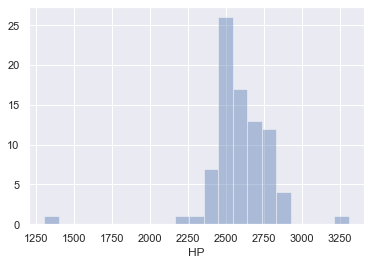

In [31]:
sns.distplot(mlbb_df['HP'], kde=False)

### Joint Plot
This plot is used for bivariate comparison of data

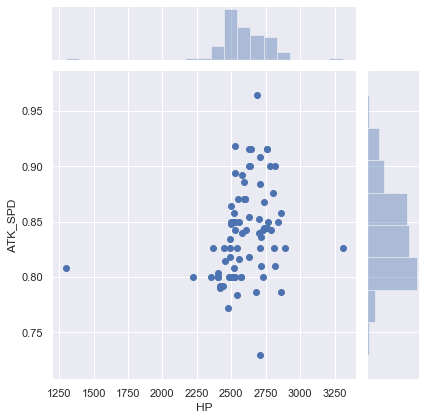

In [32]:
sns.jointplot('HP','ATK_SPD', data= mlbb_df)

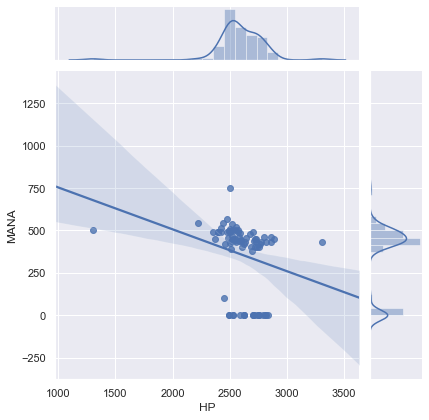

In [33]:
sns.jointplot('HP','MANA', data= mlbb_df, kind='reg')

### Pairplot
Visualize pairwise relationships across all variables in a dataframe

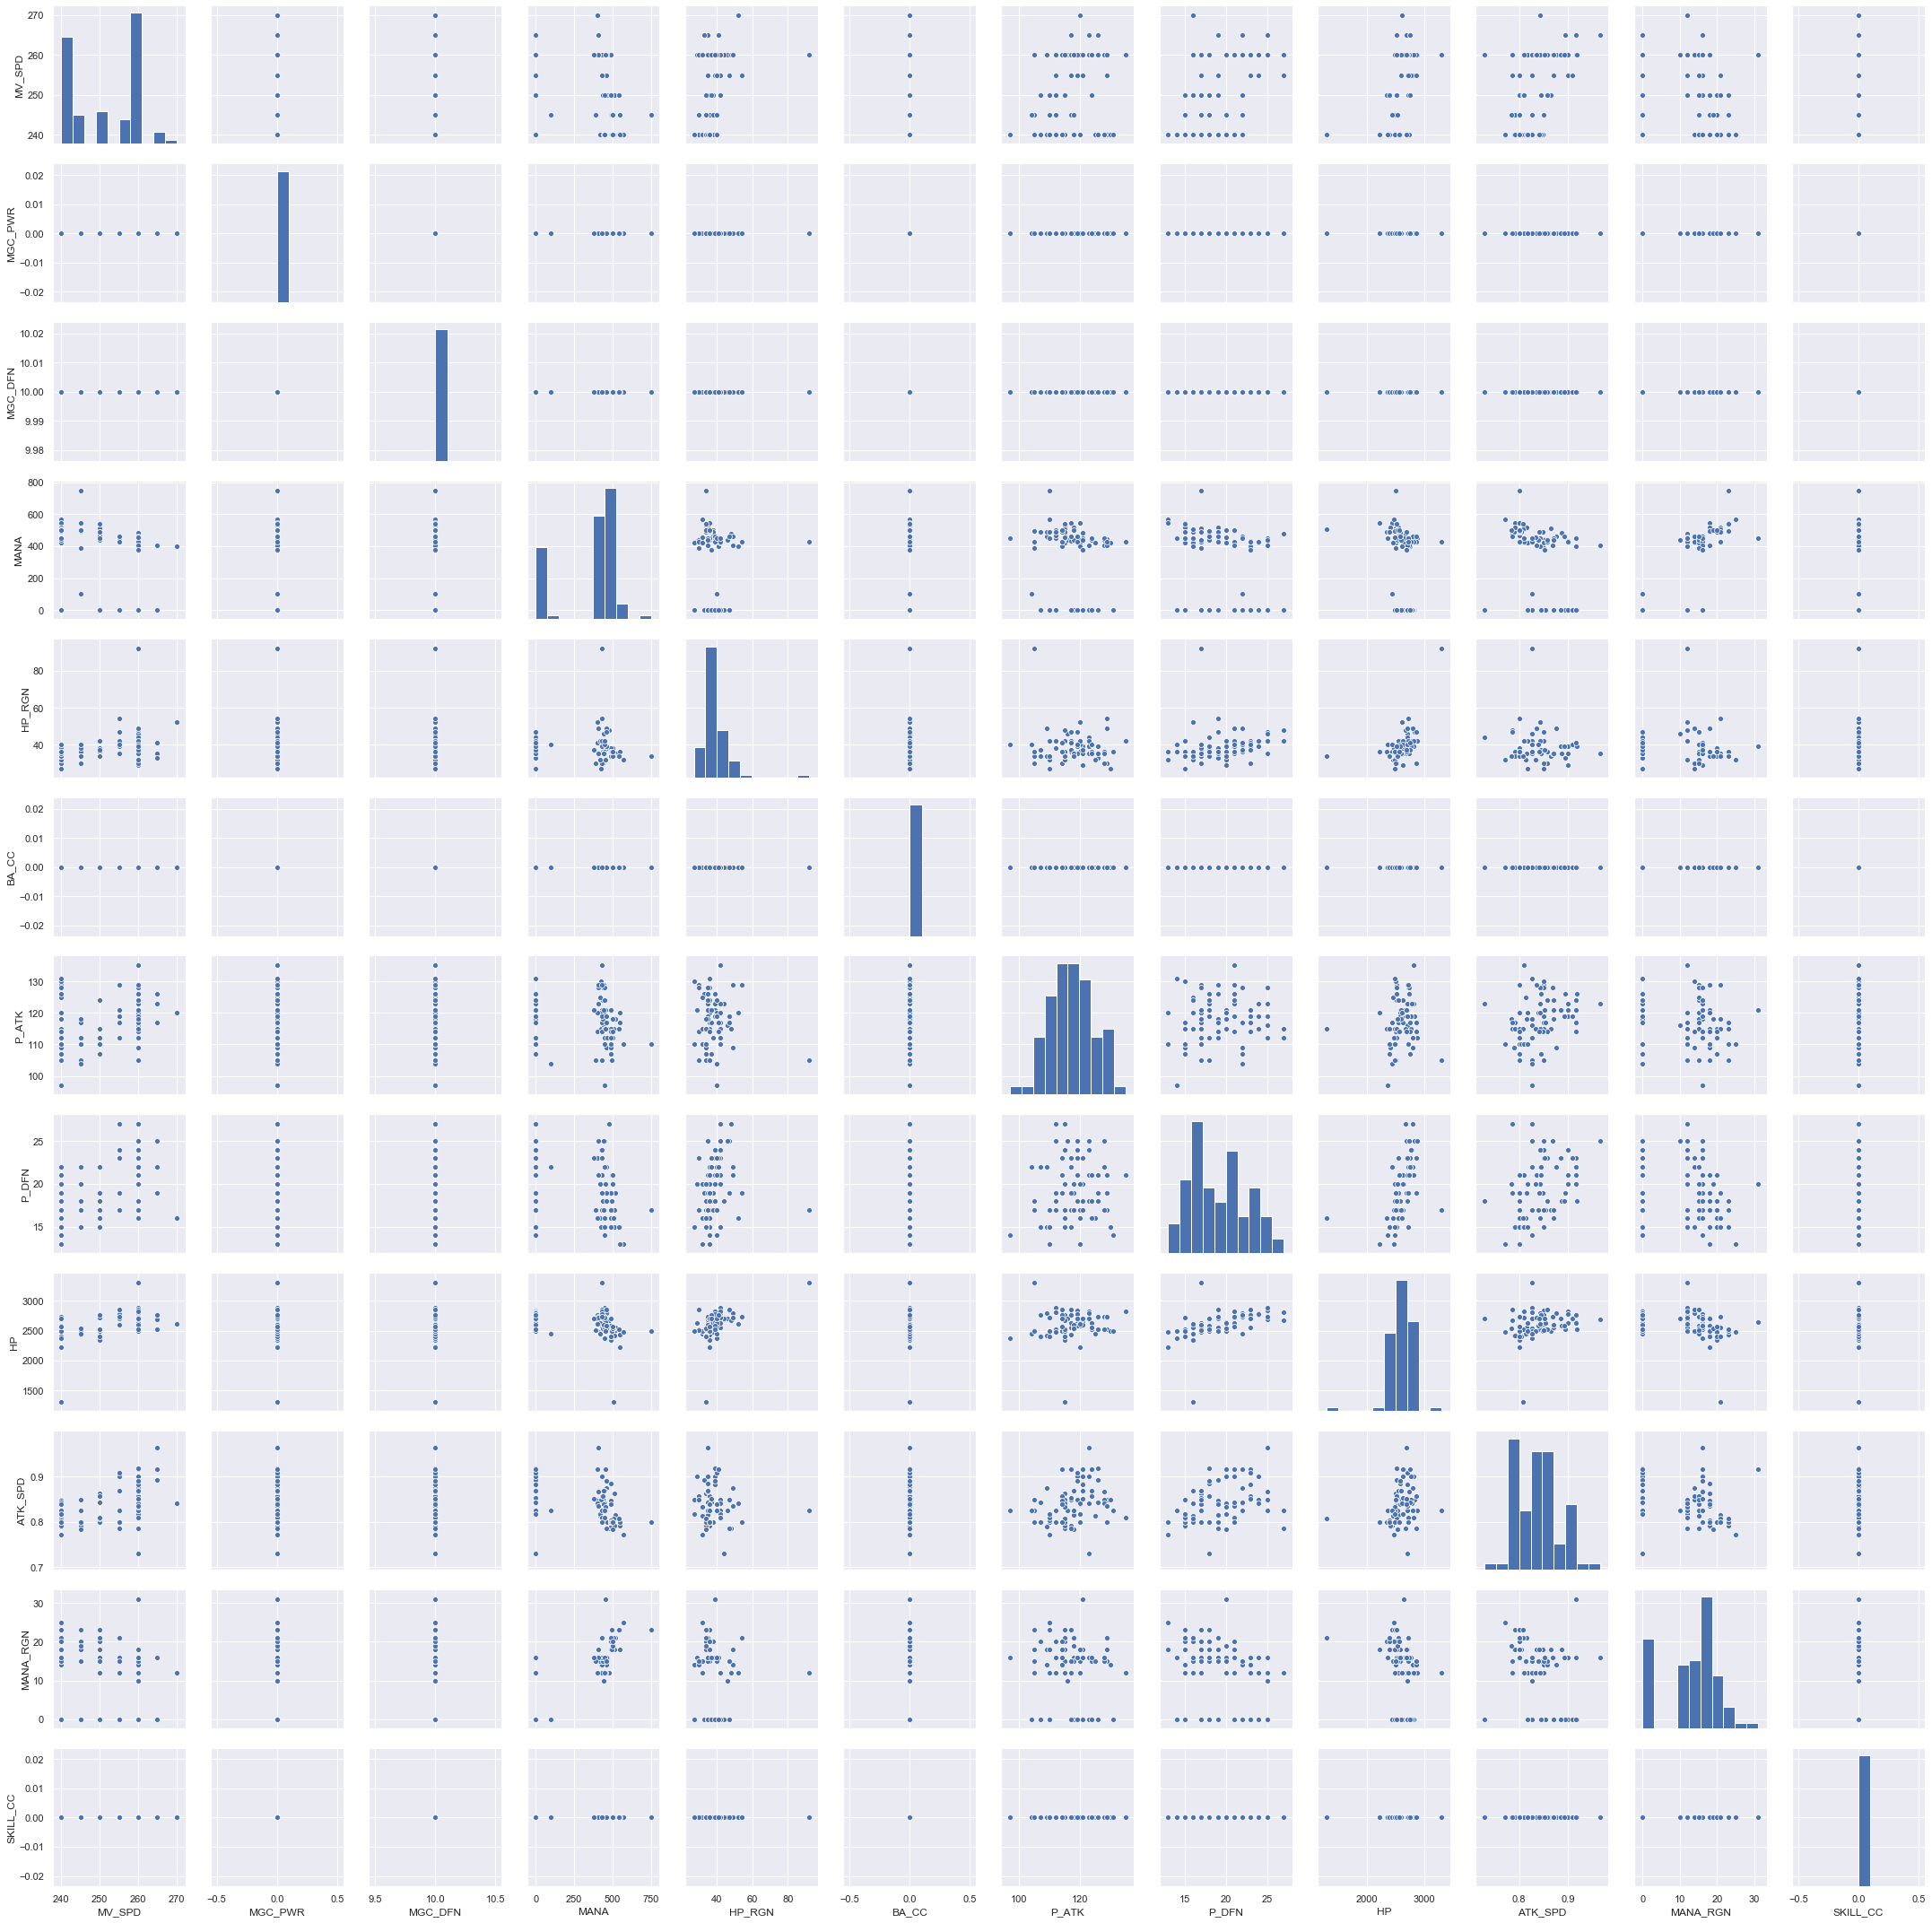

In [34]:
sns.pairplot(mlbb_df)

Pass in a `hue` parameter to define a categorical variable to be used in the pairplot

/home/n00b/miniconda3/envs/ds-mlbb/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/n00b/miniconda3/envs/ds-mlbb/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


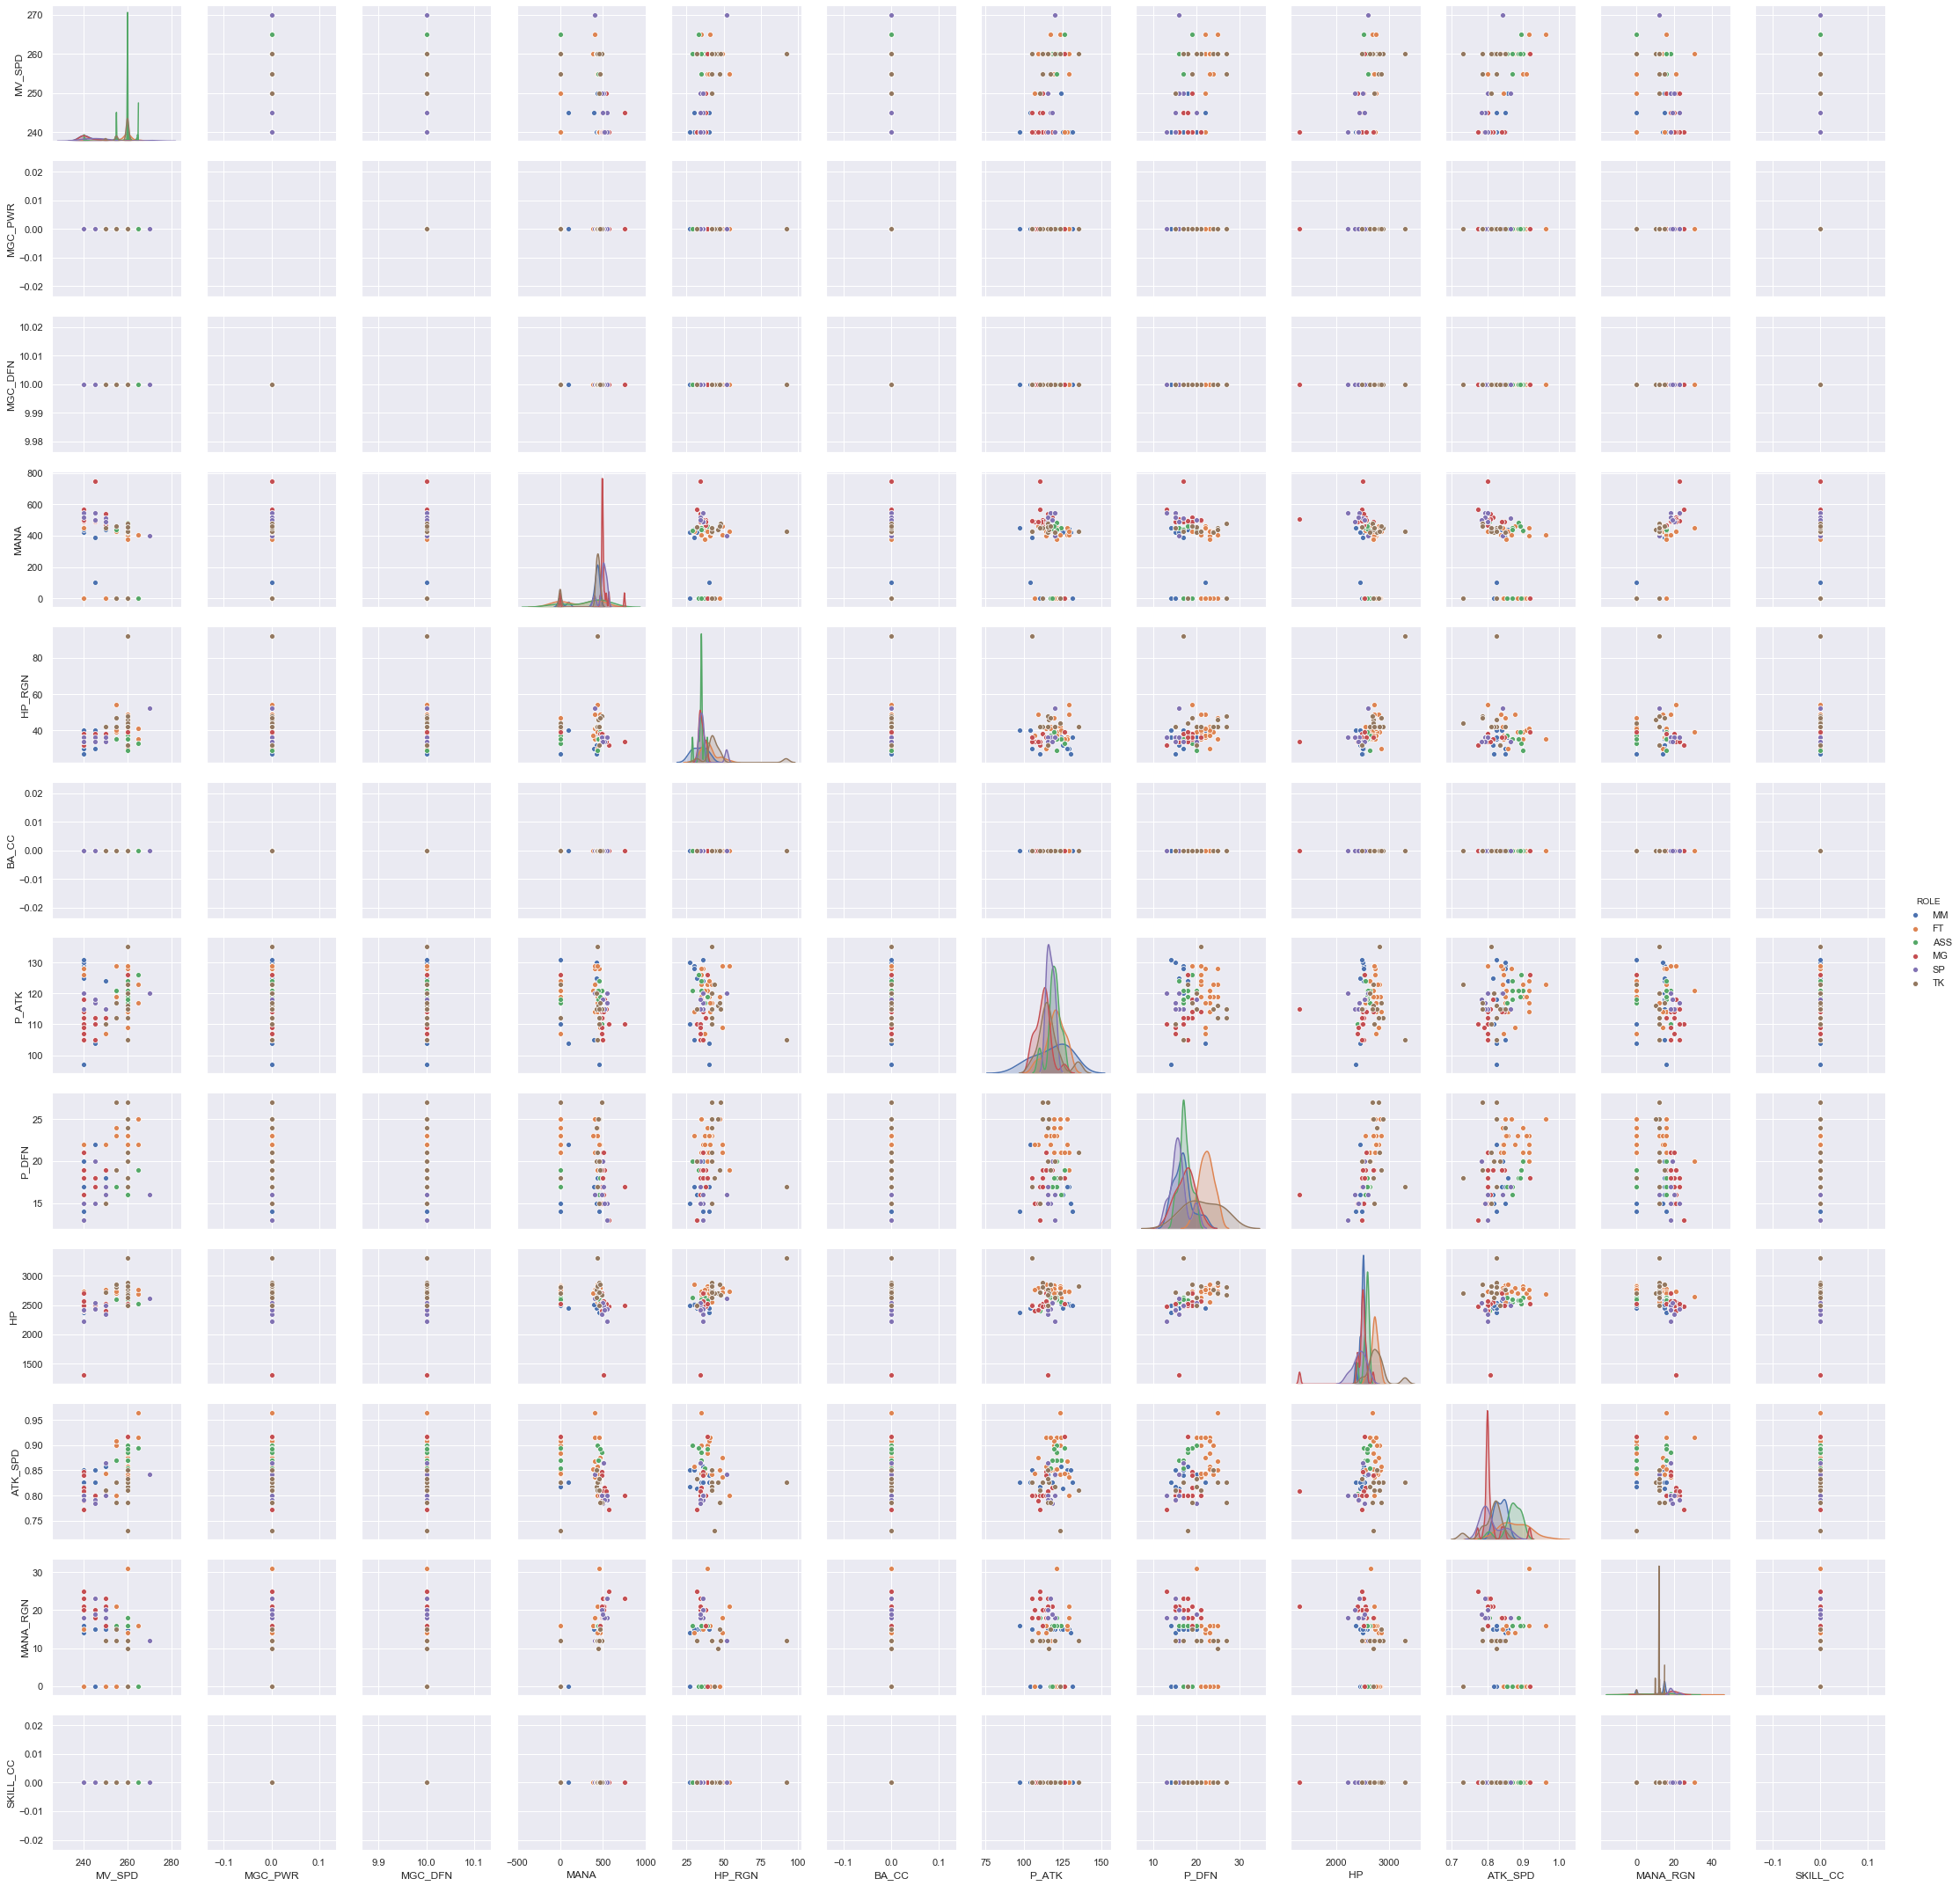

In [35]:
sns.pairplot(mlbb_df, hue='ROLE')

### Matrix Plots
Dataframes to be plotted in matrix visualizations need to be converted into a matrix format via `pivot_table()` or `corr()` function in Pandas 

In [36]:
mlbb_corr_matrix=mlbb_df.corr()
mlbb_corr_matrix

MV_SPD  MGC_PWR  MGC_DFN      MANA    HP_RGN  BA_CC     P_ATK  \
MV_SPD    1.000000      NaN      NaN -0.339685  0.388618    NaN  0.280582   
MGC_PWR        NaN      NaN      NaN       NaN       NaN    NaN       NaN   
MGC_DFN        NaN      NaN      NaN       NaN       NaN    NaN       NaN   
MANA     -0.339685      NaN      NaN  1.000000 -0.061652    NaN -0.232853   
HP_RGN    0.388618      NaN      NaN -0.061652  1.000000    NaN -0.091121   
BA_CC          NaN      NaN      NaN       NaN       NaN    NaN       NaN   
P_ATK     0.280582      NaN      NaN -0.232853 -0.091121    NaN  1.000000   
P_DFN     0.503696      NaN      NaN -0.296285  0.225630    NaN  0.134860   
HP        0.496827      NaN      NaN -0.261312  0.526942    NaN  0.122626   
ATK_SPD   0.524055      NaN      NaN -0.377022 -0.049307    NaN  0.321010   
MANA_RGN -0.348608      NaN      NaN  0.888982 -0.133457    NaN -0.206780   
SKILL_CC       NaN      NaN      NaN       NaN       NaN    NaN       NaN   

             P_DFN        HP   ATK_SPD  MANA_RGN  SKILL_CC  
MV_SPD    0.503696  0.496827  0.524055 -0.348608       NaN  
MGC_PWR        NaN       NaN       NaN       NaN       NaN  
MGC_DFN        NaN       NaN       NaN       NaN       NaN  
MANA     -0.296285 -0.261312 -0.377022  0.888982       NaN  
HP_RGN    0.225630  0.526942 -0.049307 -0.133457       NaN  
BA_CC          NaN       NaN       NaN       NaN       NaN  
P_ATK     0.134860  0.122626  0.321010 -0.206780       NaN  
P_DFN     1.000000  0.523025  0.372977 -0.297611       NaN  
HP        0.523025  1.000000  0.258629 -0.305082       NaN  
ATK_SPD   0.372977  0.258629  1.000000 -0.301606       NaN  
MANA_RGN -0.297611 -0.305082 -0.301606  1.000000       NaN  
SKILL_CC       NaN       NaN       NaN       NaN       NaN

### Heatmap
A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

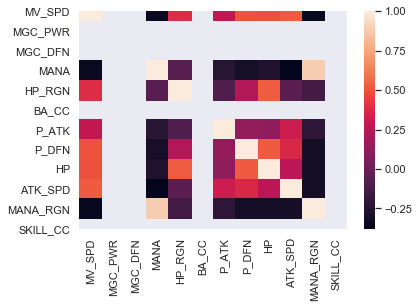

In [37]:
sns.heatmap(mlbb_corr_matrix)

Passing an *annotation* parameter in the `sns.heatmap()`

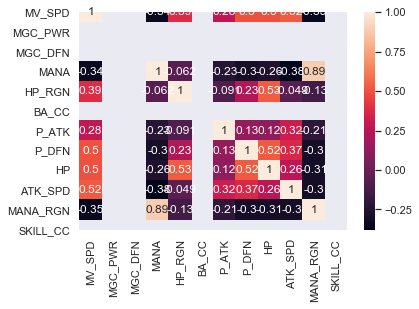

In [38]:
sns.heatmap(mlbb_corr_matrix, annot=True)

Another way of converting regular dataframes into matrix form is through pivot tables. In this example the `SPECIALTY` column will be used as the index

In [43]:
mlbb_matrix= mlbb_df.pivot_table(index='SPECIALTY', columns='ROLE', values='HP')
mlbb_matrix

ROLE               ASS           FT           MG           MM      SP      TK
SPECIALTY                                                                    
Burst              NaN          NaN  2504.600000  2530.000000     NaN     NaN
Charge         2587.75  2729.916667  2600.666667          NaN     NaN     NaN
Crowd Control      NaN  2859.000000  2451.000000          NaN  2351.0  2762.5
Damage             NaN  2728.000000  2499.400000  2450.000000     NaN     NaN
Initiator          NaN  2698.000000          NaN          NaN  2576.0  2739.0
Poke               NaN          NaN  2481.000000          NaN  2501.0     NaN
Push               NaN  2671.666667  2401.000000  2455.000000     NaN     NaN
Reap           2497.50  2742.000000  1301.000000  2503.777778     NaN     NaN
Regen              NaN  2789.000000  2573.000000  2510.000000  2361.0  2839.0
initiator          NaN          NaN          NaN          NaN     NaN  2819.0

The heatmap is rendered with an additional parameter `cmap` (color map)

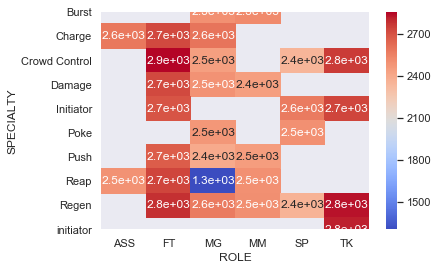

In [44]:
sns.heatmap(mlbb_matrix, annot=True, cmap='coolwarm')